In [1]:
import cv2
import numpy as np
import os
import sys
import random
import matplotlib.pyplot as plt
from skimage.feature import hessian_matrix, hessian_matrix_eigvals

In [7]:
IMG_SIZE = 512

In [3]:
def get_random_image():
    path = "./new/"
    folder = random.randint(0,4)
    img = random.choice(os.listdir(path + str(folder)))
    return path + str(folder) + "/" + img
    

In [4]:
def crop_image_from_gray(img,tol=7):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
    #         print(img1.shape,img2.shape,img3.shape)
            img = np.stack([img1,img2,img3],axis=-1)
    #         print(img.shape)
        return img

In [5]:
def circle_crop(img, sigmaX=10):   
    """
    Create circular crop around image centre    
    """    
    
    img = cv2.imread(img)
    img = crop_image_from_gray(img)    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    height, width, depth = img.shape    
    
    x = int(width/2)
    y = int(height/2)
    r = np.amin((x,y))
    
    circle_img = np.zeros((height, width), np.uint8)
    cv2.circle(circle_img, (x,y), int(r), 1, thickness=-1)
    img = cv2.bitwise_and(img, img, mask=circle_img)
    img = crop_image_from_gray(img)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img=cv2.addWeighted ( img,4, cv2.GaussianBlur( img , (0,0) , sigmaX) ,-4 ,128)
    return img 

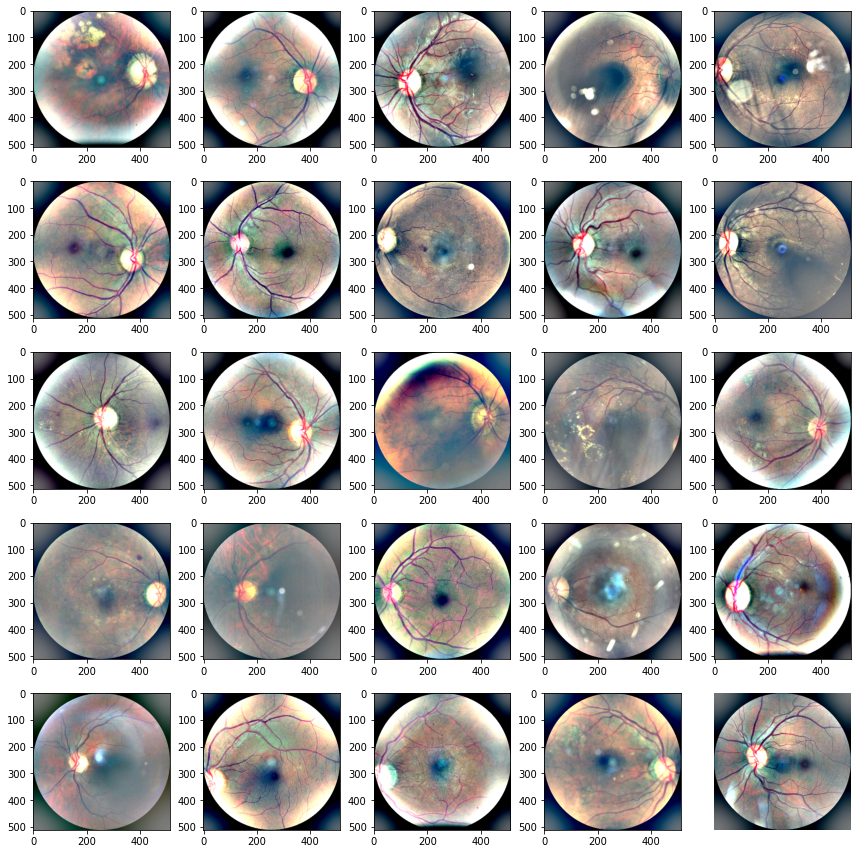

In [9]:
figure,axis = plt.subplots(nrows=5,ncols=5,figsize=(12,12))
for i,ax in enumerate(axis.flat):
    img = get_random_image()
    image = circle_crop(img, 30)
    ax.imshow(image)
plt.tight_layout()
plt.axis("off")
plt.show()

In [10]:
def convert_images():
    l = ['0', '1', '2', '3', '4']
    print("Başladı")
    count = 0
    for m, _, f in os.walk("./new/"):
        if len(f) > 1:
            for file in f:
                if count % 1000 == 0:
                    print(count)
                #print(m + "/" + file + "    DONE")
                image = circle_crop(m + "/" + file, 30)
                plt.imsave("./new_converted_imgs/" + l[int(m[-1])] + "/" + file, image)
                count+=1
            print(m + "    DONE")
convert_images()

Başladı
0
./new/0    DONE
1000
./new/1    DONE
2000
./new/2    DONE
./new/3    DONE
3000
./new/4    DONE
